In [18]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

import seaborn as sns


In [2]:
file_to_load = "Resources/hotel_bookings.csv"
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

In [3]:
#purchase_data.info()

In [4]:
#Checking missing values
purchase_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#Country, agent, and company have missing values. Fill data with 0s. 
clean_purchase_data = purchase_data.fillna(value=0)


In [6]:
hotel = pd.read_csv('Resources/hotel_bookings.csv', usecols = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'])
hotel.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [7]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  object 
 1   is_canceled                  119390 non-null  int64  
 2   adults                       119390 non-null  int64  
 3   children                     119386 non-null  float64
 4   babies                       119390 non-null  int64  
 5   meal                         119390 non-null  object 
 6   country                      118902 non-null  object 
 7   market_segment               119390 non-null  object 
 8   distribution_channel         119390 non-null  object 
 9   reserved_room_type           119390 non-null  object 
 10  booking_changes              119390 non-null  int64  
 11  deposit_type                 119390 non-null  object 
 12  days_in_waiting_list         119390 non-null  int64  
 13 

In [8]:
hotel_cancel = hotel['hotel'].value_counts()

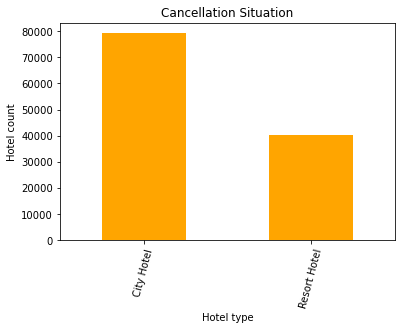

In [11]:
#Cancellations City hotel vs. Resort:
cancel_plot = hotel_cancel.plot(kind='bar', rot=75, color = "orange", title="Cancellation Situation")
cancel_plot.set_xlabel("Hotel type")
cancel_plot.set_ylabel("Hotel count")
plt.show()

-City Hotels has the highest cancellation rate

In [10]:
#Cancellations percentages
hotel_eda = hotel.copy()
hotel_eda['hotel'].value_counts()
hotel_eda['is_canceled'].value_counts()/hotel.shape[0]*100

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64

37,04% of booking were canceled

In [12]:
#Bookings with children analiysis:
hotel_eda['all_child'] = hotel_eda['children'] + hotel_eda['babies']

pd.crosstab(hotel_eda['adults'], hotel_eda['all_child'], margins=True, margins_name = 'Total')

all_child,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


Adults without children = 110,054 \
Adults with 1 child = 5446 \
Adults with 2 children = 3772 \
Adults with 3 children = 111 

From the above table we can deduce that of the 119 thousand reservations, 110,054 were reservations for without children, most of them couples, followed by people traveling alone.

When there are more bookings with children, two adults travel, we can deduce that they are couples and their children


In [36]:
#Market segments count:

segments = clean_purchase_data["market_segment"].value_counts()
segments

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 1.0, 'Bookings per market segment')

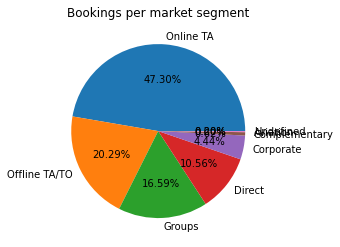

In [37]:
#Bookings by market segment


plt.pie(segments, autopct="%1.2f%%", labels=segments.index.values)

plt.title("Bookings per market segment")

47.30% of bookings were made online, 20.29% offline \
The rest were made by groups, corporations, directly at the hotel or by airline packages


In [40]:
#Cancellations per month

month = clean_purchase_data["arrival_date_month"].value_counts()
month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

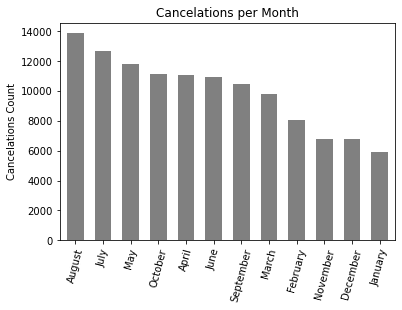

In [64]:
month_plot = month.plot(kind='bar', rot=75, color = "gray", title="Cancelations per Month", width= .6)

month_plot.set_ylabel("Cancelations Count")
plt.show()

August is the month with more cancelations and January is the month with less cancelations

For the Resort hotel it is highest cancelations in the summer and lowest during the winter